# Basic Image Manipulations

In this notebook we will cover how to perform image transformations including:

* Accessing and manipulating images pixels
* Image resizing
* Cropping
* Flipping

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline
print("done")

done


##  <font style="color:black">Download Assets</font>

The `download_and_unzip(...)` is used to download and extract the notebook assests.

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

### <font style="color:rgb(8,133,37)">Original checkerboard image</font>

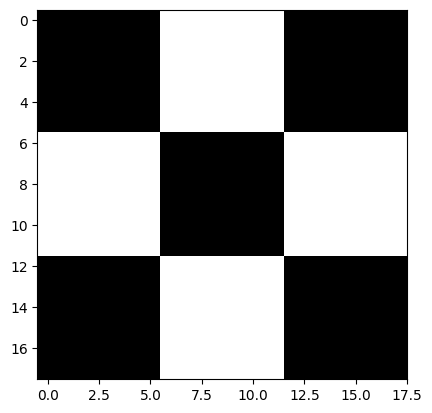

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [6]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Set color map to gray scale for proper rendering.
plt.close("all")
plt.imshow(cb_img, cmap="gray")
plt.show()
print(cb_img)

## Accessing Individual Pixels
Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as matrix[r,c], where the r is the row number and c is the column number. Also note that the matrix is 0-indexed.

For example, if you want to access the first pixel, you need to specify matrix[0,0]. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.

In [7]:
# print the first pixel of the first black box
print(cb_img[0, 0])
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

0
255


## <font style="color:black">Modifying Image Pixels</font>
We can modify the intensity values of pixels in the same manner as described above.

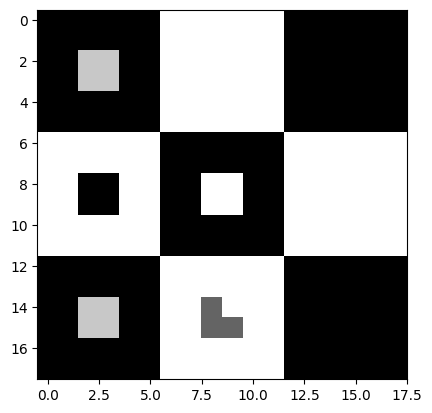

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255   0   0 255 255   0   0 255 255   0   0 255 255 255 255 255 255]
 [255 255   0   0 255 255   0   0 255 255   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [40]:
cb_img_copy = cb_img.copy()
cb_img_copy[2, 2] = 200
cb_img_copy[2, 3] = 200
cb_img_copy[3, 2] = 200
cb_img_copy[3, 3] = 200

# other field added by Osman
cb_img_copy[8, 2] = 0
cb_img_copy[8, 3] = 0
cb_img_copy[9, 2] = 0
cb_img_copy[9, 3] = 0

# other field added by Osman
cb_img_copy[8, 8] = 255
cb_img_copy[8, 9] = 255
cb_img_copy[9, 8] = 255
cb_img_copy[9, 9] = 255

# other field added by Osman
cb_img_copy[14, 2] = 200
cb_img_copy[14, 3] = 200
cb_img_copy[15, 2] = 200
cb_img_copy[15, 3] = 200

# other field added by Osman
cb_img_copy[14, 8] = 100
#cb_img_copy[14, 9] = 100
cb_img_copy[15, 8] = 100
cb_img_copy[15, 9] = 100


# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.close("all")
plt.imshow(cb_img_copy, cmap="gray")
plt.show()
print(cb_img_copy)

# Cropping Images

Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

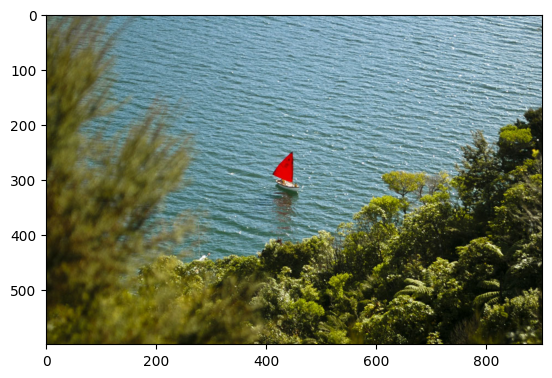

In [41]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg", cv2.IMREAD_COLOR)
img_NZ_rgb = img_NZ_bgr[:, :, ::-1]

plt.close("all")
plt.imshow(img_NZ_rgb)
plt.show()

### <font color="green">Crop out the middle region of the image</font>

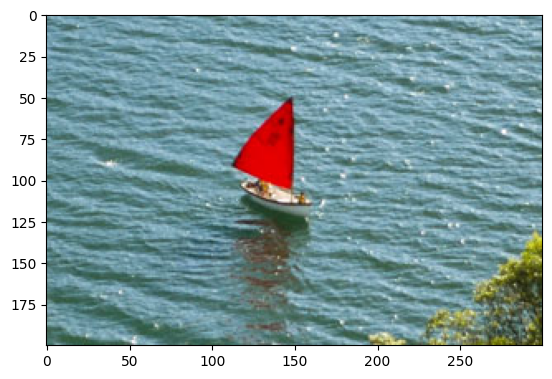

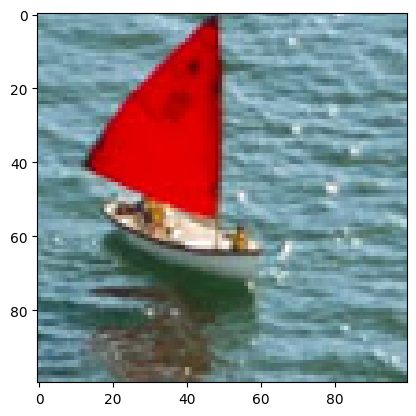

In [42]:
cropped_region = img_NZ_rgb[200:400, 300:600]

plt.close("all")
plt.imshow(cropped_region)
plt.show()

# other field added by Osman
cropped_region2 = img_NZ_rgb[250:350, 400:500]
plt.close("all")
plt.imshow(cropped_region2)
plt.show()

# Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image

2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Documentation link</a>

### <font color="green"> Method 1: Specifying Scaling Factor using fx and fy


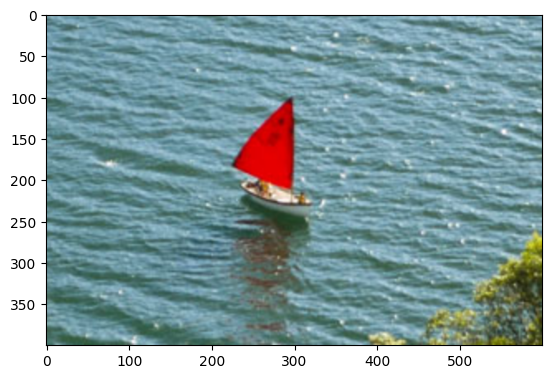

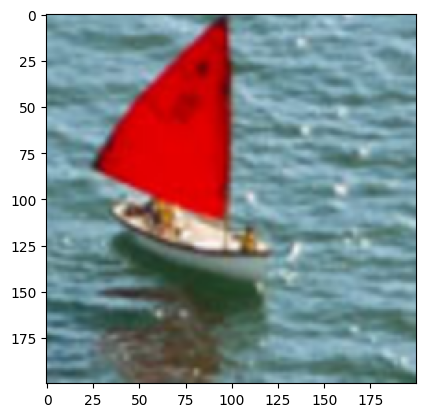

In [46]:
resized_cropped_region_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.close("all")
plt.imshow(resized_cropped_region_2x)
plt.show()

# other field added by Osman
resized_cropped2_region_2x = cv2.resize(cropped_region2, None, fx=2, fy=2)
plt.close("all")
plt.imshow(resized_cropped2_region_2x)
plt.show()

### <font color="green">Medthod 2: Specifying exact size of the output image</font>

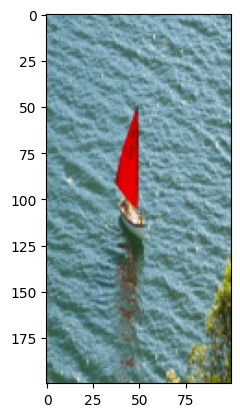

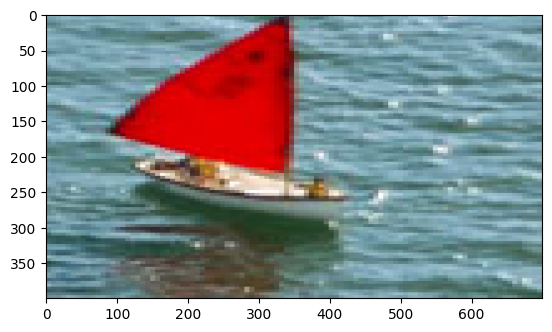

In [52]:
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.close("all")
plt.imshow(resized_cropped_region)
plt.show()

# other field added by Osman
resized_cropped_region = cv2.resize(cropped_region2, dsize=(700, 400), interpolation=cv2.INTER_AREA)
plt.close("all")
plt.imshow(resized_cropped_region)
plt.show()


### <font color="green">Resize while maintaining aspect ratio</font>

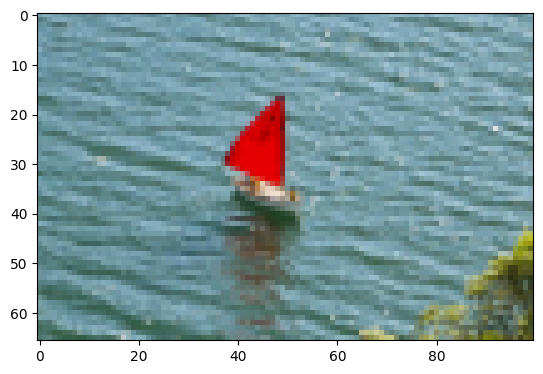

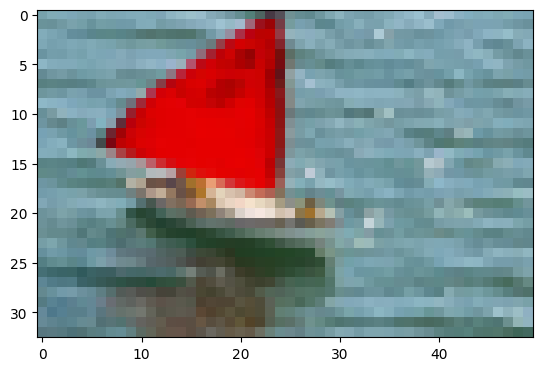

In [59]:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.close("all")
plt.imshow(resized_cropped_region)
plt.show()

# other field added by Osman

desired_width2 = 50
aspect_ratio2 = desired_width2 / cropped_region.shape[1]
desired_height2 = int(cropped_region.shape[0] * aspect_ratio2)
dim = (desired_width2, desired_height2)

resized_cropped_region = cv2.resize(cropped_region2, dsize=dim, interpolation=cv2.INTER_AREA)
plt.close("all")
plt.imshow(resized_cropped_region)
plt.show()


### <font style="color:rgb(8,133,37)">Let's actually show the (cropped) resized image.</font>

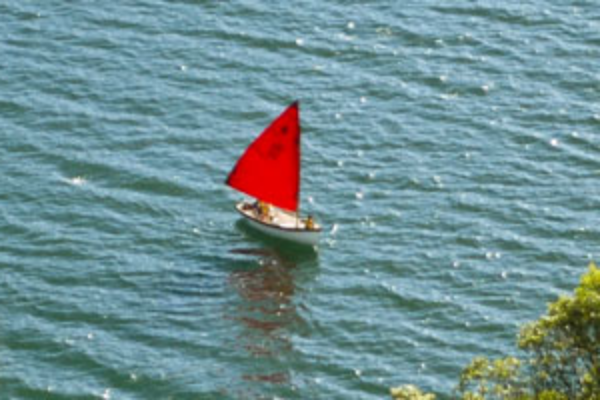

In [62]:
# Swap channel order
resized_cropped_region_2x = resized_cropped_region_2x[:, :, ::-1]

# Save resized image to disk
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

# Display the cropped and resized image
Image(filename="resized_cropped_region_2x.png")





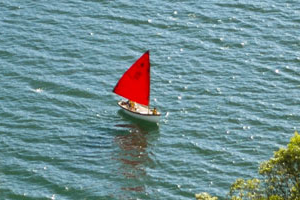

In [63]:
# Swap channel order
cropped_region = cropped_region[:, :, ::-1]

# Save cropped 'region'
cv2.imwrite("cropped_region.png", cropped_region)

# Display the cropped and resized image
Image(filename="cropped_region.png")

# Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Documentation link</a>

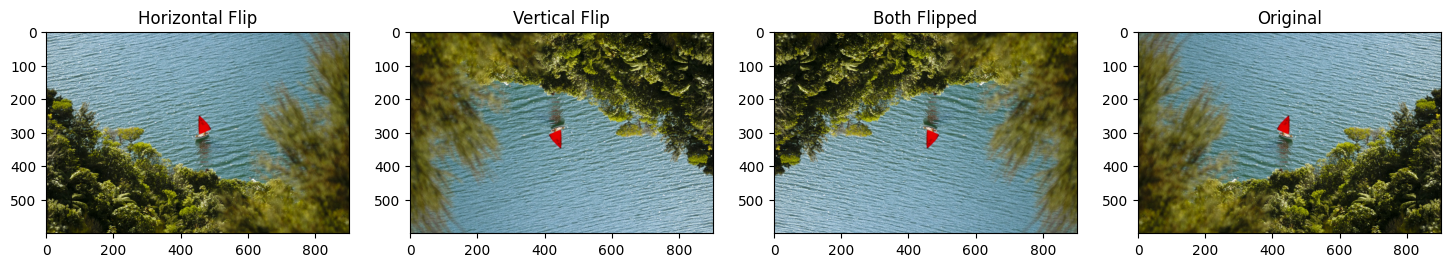

In [65]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.close("all")
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");
plt.show()

## Thank You!
# plt.close("all") added
# plt.show() added